In [30]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [31]:
ds_name = 'DS_0601'
classe = '1S'

latex_info = {}
latex_info['titre'] = 'DS 8' 
latex_info['classe'] = '\\premiereS'
latex_info['date'] = '1 juin 2015'
latex_info

{'classe': '\\premiereS', 'date': '1 juin 2015', 'titre': 'DS 8'}

# Import et premiers traitements

In [32]:
notes = pd.ExcelFile("./../../../notes_"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [33]:
notes.index

Index(['DS_0601', 'av_arrondi', 'Exercice 1', '1 (domaine définition)',
       '2.a (dérivation)', '2.b (dérivation)', '3.a (signe)',
       '3.b (variations)', '4.a(tangente)', '4.b (tangente)', 'malus',
       'Exercice 2', '1 (termes)', '2 (nature suite)', '3.a (simplification)',
       '3.b (nature suite)', '4.a (nature suite)', '4.b (variations)',
       '5 (calcul)', 'Exercice 3'],
      dtype='object')

In [34]:
notes = notes.T

In [35]:
notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('subj_num', axis=1)

In [36]:
barem = notes[:1]
notes = notes[1:]
#notes

## Supression des notes inutiles 

In [37]:
notes = notes[notes[ds_name].notnull()]
notes = notes[notes[ds_name] != 0]

In [38]:
notes = notes.astype(float)

## Traitement des notes

In [39]:
notes.T.index

Index(['DS_0601', 'Exercice 1', '1 (domaine définition)', '2.a (dérivation)',
       '2.b (dérivation)', '3.a (signe)', '3.b (variations)', '4.a(tangente)',
       '4.b (tangente)', 'malus', 'Exercice 2', '1 (termes)',
       '2 (nature suite)', '3.a (simplification)', '3.b (nature suite)',
       '4.a (nature suite)', '4.b (variations)', '5 (calcul)', 'Exercice 3'],
      dtype='object')

In [40]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3"]

In [41]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [42]:
item_avec_note = list_exo + [ds_name, "malus"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1 (domaine définition)',
 '2.a (dérivation)',
 '2.b (dérivation)',
 '3.a (signe)',
 '3.b (variations)',
 '4.a(tangente)',
 '4.b (tangente)',
 '1 (termes)',
 '2 (nature suite)',
 '3.a (simplification)',
 '3.b (nature suite)',
 '4.a (nature suite)',
 '4.b (variations)',
 '5 (calcul)']

In [43]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [44]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [45]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [46]:
len(notes.T.index)

19

# Preparation du fichier .tex

In [47]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [48]:
notes[ds_name].describe()

count    28.000000
mean      9.785714
std       3.784541
min       2.000000
25%       7.375000
50%       9.250000
75%      12.500000
max      17.500000
Name: DS_0601, dtype: float64

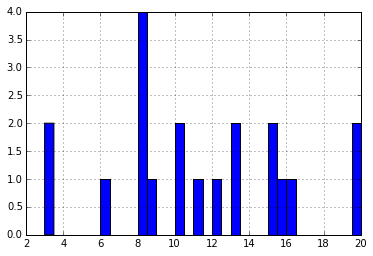

In [34]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [35]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [36]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1.1  1.2  2.A.1  2.A.2  2.A.3.a  2.A.3.b  2.A.3.c  2.B.1  2.B.2  3.A.1  \
count  NaN  NaN    NaN    NaN      NaN      NaN      NaN    NaN    NaN    NaN   

       3.A.2  3.B.1  3.B.2  3.B.3  4.A.1  4.A.1.a  4.A.1.b  4.B.1  4.B.2  \
count    NaN    NaN    NaN    NaN    NaN      NaN      NaN    NaN    NaN   

       4.B.3  
count    NaN